## Análisis Nacidos Vivos Registrados 2018

---
## RECOLECCIÓN Y PREPARACIÓN DE DATOS

In [1]:
# Carga de librerías
import pandas as pd
import matplotlib.pyplot as plt

In [2]:
# Carga de datos
df = pd.read_csv('src/nacidos-vivos-registrados-2018_deis.csv')

---
## ANÁLISIS EXPLORATORIO

In [3]:
df.head()

,jurisdiccion_de_residencia_id,jurisdiccion_de_residencia_nombre,tipo_de_parto_id,tipo_de_parto_nombre,sexo,sexo_nombre,edad_de_la_madre_grupos_id,edad_de_la_madre_grupos_nombre,semanas_de_gestacion_id,semanas_de_gestacion_nombre,instruccion_de_la_madre_id,instruccion_de_la_madre_nombre,Intervalos_de_peso_al_nacer_id,intervalos_de_peso_al_nacer_nombre,cantidad_nacimientos
0,34,Formosa,1,Simple,2,Mujer,4,25 a 29,5,32 a 36,3,Primaria/C. EGB Completa,5,2000 a 2499,3
1,2,Ciudad Aut. de Buenos Aires,1,Simple,1,Varón,7,40 a 44,6,37 a 41,3,Primaria/C. EGB Completa,6,2500 a 2999,13
2,6,Buenos Aires,1,Simple,1,Varón,5,30 a 34,8,Sin especificar,7,Terciaria/Universitaria Comple,4,1500 a 1999,1
3,82,Santa Fe,1,Simple,2,Mujer,6,35 a 39,6,37 a 41,7,Terciaria/Universitaria Comple,5,2000 a 2499,30
4,74,San Luis,1,Simple,1,Varón,6,35 a 39,5,32 a 36,5,Secundaria/Polimodal Completa,6,2500 a 2999,4


In [4]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 30099 entries, 0 to 30098
Data columns (total 15 columns):
 #   Column                              Non-Null Count  Dtype 
---  ------                              --------------  ----- 
 0   jurisdiccion_de_residencia_id       30099 non-null  int64 
 1   jurisdiccion_de_residencia_nombre   30099 non-null  object
 2   tipo_de_parto_id                    30099 non-null  int64 
 3   tipo_de_parto_nombre                30099 non-null  object
 4   sexo                                30099 non-null  int64 
 5   sexo_nombre                         30099 non-null  object
 6   edad_de_la_madre_grupos_id          30099 non-null  int64 
 7   edad_de_la_madre_grupos_nombre      30099 non-null  object
 8   semanas_de_gestacion_id             30099 non-null  int64 
 9   semanas_de_gestacion_nombre         30099 non-null  object
 10  instruccion_de_la_madre_id          30099 non-null  int64 
 11  instruccion_de_la_madre_nombre      30099 non-null  ob

---
## PROCESAMIENTO Y ANÁLISIS DE DATOS

#### Lista que contiene los niveles de instrucción organizados de forma jerárquica:

In [5]:
#Enlazo los id instrucción con su correspondiente nombre según orden de aparición:
instruccion_id = df['instruccion_de_la_madre_id'].unique()
instruccion_nombre = df['instruccion_de_la_madre_nombre'].unique()

instruccion_id_nombre = {}
for i in range(len(instruccion_id)):
   instruccion_id_nombre[instruccion_id[i]] = instruccion_nombre[i]

#Los reorganizo según nivel de instrucción:
instruccion_nombres_organizados = []
for i in range(len(instruccion_id_nombre)):
    instruccion_nombres_organizados.append(instruccion_id_nombre[i+1])

print(instruccion_id_nombre)
print(instruccion_nombres_organizados)

{3: 'Primaria/C. EGB Completa', 7: 'Terciaria/Universitaria Comple', 5: 'Secundaria/Polimodal Completa', 2: 'Primaria/C. EGB Incompleta', 8: 'Sin especificar', 4: 'Secundaria/Polimodal Incomplet', 6: 'Terciaria/Universitaria Incomp', 1: 'Sin instrucción'}
['Sin instrucción', 'Primaria/C. EGB Incompleta', 'Primaria/C. EGB Completa', 'Secundaria/Polimodal Incomplet', 'Secundaria/Polimodal Completa', 'Terciaria/Universitaria Incomp', 'Terciaria/Universitaria Comple', 'Sin especificar']


#### Lista que contiene los grupos etarios organizados de menor a mayor:

In [6]:
#Enlazo los id de grupos etarios con su correspondiente nombre según orden de aparición:
edad_id = df['edad_de_la_madre_grupos_id'].unique()
edad_rango = df['edad_de_la_madre_grupos_nombre'].unique()

edad_id_rango = {}
for i in range(len(edad_id)):
    edad_id_rango[edad_id[i]] = edad_rango[i]

#Los reorganizo de menor a mayor:
edad_id_rango_organizado = []
for i in range(len(edad_id_rango)):
    edad_id_rango_organizado.append(edad_id_rango[i+1])

print(edad_id_rango_organizado)

['Menor de 15', '15 a 19', '20 a 24', '25 a 29', '30 a 34', '35 a 39', '40 a 44', 'De 45 y más', 'Sin especificar']


---
## CONSULTAS Y GRÁFICOS

### Consulta: Cantidad de Nacimientos por nivel de instrucción

In [7]:
# Agrupar según nivel de instrucción y sumar los nacimientos correspondientes a cada nivel:
nacimientos_x_instruccion = df.groupby('instruccion_de_la_madre_id')['cantidad_nacimientos'].sum()

print(nacimientos_x_instruccion)

instruccion_de_la_madre_id
1      1726
2     22305
3    102035
4    161474
5    205616
6     44745
7     95637
8     51856
Name: cantidad_nacimientos, dtype: int64


In [8]:
#Calculo los porcentajes de nacimientos según orden de instrucción:
total_nacimientos = nacimientos_x_instruccion.sum()

porcentajes_nacimientos_instruccion = []
for i in range(len(nacimientos_x_instruccion)):
    porcentaje = nacimientos_x_instruccion[i+1]*100/total_nacimientos
    porcentaje = round(porcentaje, 2)
    porcentajes_nacimientos_instruccion.append(porcentaje)

print(porcentajes_nacimientos_instruccion)

[0.25, 3.25, 14.89, 23.56, 30.0, 6.53, 13.95, 7.57]


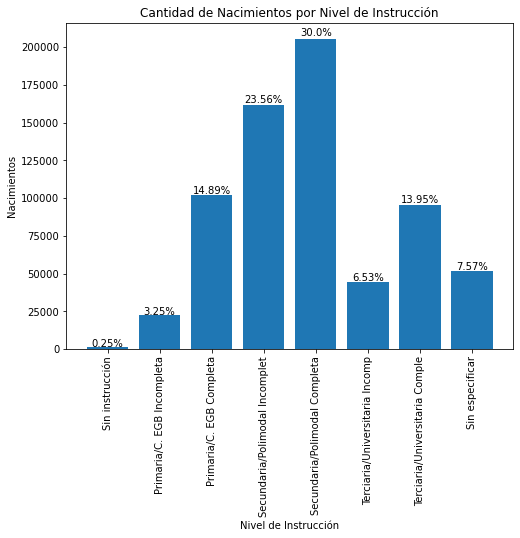

In [9]:
#Gráfico cantidad de nacimientos según nivel de instrucción:
plt.figure(figsize=(8, 6))
grafico = plt.bar(range(len(instruccion_nombres_organizados)), list(nacimientos_x_instruccion))
plt.xticks(range(len(instruccion_nombres_organizados)), instruccion_nombres_organizados, rotation='vertical')
plt.title('Cantidad de Nacimientos por Nivel de Instrucción')
plt.xlabel('Nivel de Instrucción')
plt.ylabel('Nacimientos')

#Coloco los porcentajes sobre las barras:
i = 0
for barra in grafico:
    ancho = barra.get_width()
    alto = barra.get_height()
    x, y = barra.get_xy()
    
    plt.text(x+ancho/2, y+alto*1.01, str(porcentajes_nacimientos_instruccion[i])+"%", ha='center')
    i += 1

plt.show()

### Consulta: Comparativa de nacimientos según edad de la madre para máximos y mínimos niveles educativos

In [10]:
#Agrupar según nivel de instrucción y edad y sumar los nacimientos correspondientes a cada combinación
nacimientos_instruccion_edad = df.groupby(['instruccion_de_la_madre_id', 'edad_de_la_madre_grupos_id'])['cantidad_nacimientos'].sum()

print(nacimientos_instruccion_edad)

instruccion_de_la_madre_id  edad_de_la_madre_grupos_id
1                           1                               17
                            2                              232
                            3                              391
                            4                              375
                            5                              350
                                                          ... 
8                           5                             8896
                            6                             5658
                            7                             1558
                            8                              114
                            9                             5398
Name: cantidad_nacimientos, Length: 69, dtype: int64


In [11]:
#Función que suma los nacimientos según edades para el rango de instrucción determinado:
def suma_nacimientos_xedad_xinstruccion(min_instruccion, max_instruccion):
    suma_nxexi = []
    for i in range(len(edad_id_rango_organizado)):
        nacimientos = 0
        for nivel_instruccion in range(min_instruccion, max_instruccion):
            try:
                nacimientos += nacimientos_instruccion_edad[nivel_instruccion][i+1]
            except KeyError:
                nacimientos += 0
        suma_nxexi.append(nacimientos)
    return suma_nxexi

#Calculo la sumatoria de nacimientos para rangos de baja y alta instrucción:

# 1 - Sin Instrucción
# 2 - Primaria Incompleta, 3 - Primaria Completa
# 4 - Secundaria Incompleta, 5 - Secundaria Completa
# 6 - Terciario Incompleto, 7 - Terciario Completo
# 8 - Sin especificar

#Baja instrucción: Sin instrucción a Secundario Incompleto
suma_nxe_instruccion_baja = suma_nacimientos_xedad_xinstruccion(1, 5)

#Alta instrucción: Secundario Completo a Terciario Completo
suma_nxe_instruccion_alta = suma_nacimientos_xedad_xinstruccion(5, 8)

print(suma_nxe_instruccion_baja)
print(suma_nxe_instruccion_alta)

[2147, 62616, 81347, 62569, 41422, 26118, 7979, 526, 2816]
[0, 15732, 70978, 89133, 90361, 59733, 15329, 1287, 3445]


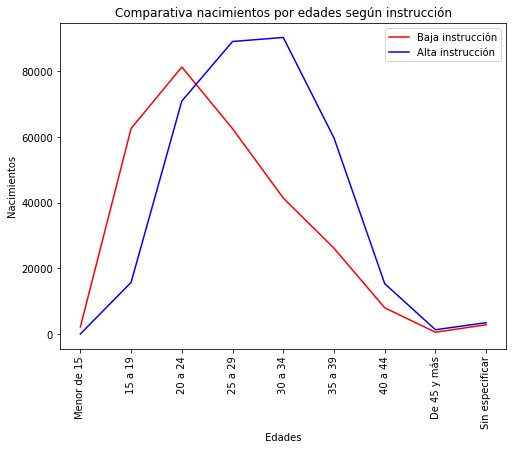

In [12]:
#Gráfico de cantidad de nacimientos según edades para baja y alta instrucción:
plt.figure(figsize=(8, 6))
plt.plot(range(len(edad_id_rango_organizado)), suma_nxe_instruccion_baja, color='r', label='Baja instrucción')
plt.plot(suma_nxe_instruccion_alta, color='b', label='Alta instrucción')
plt.xticks(range(len(edad_id_rango_organizado)), edad_id_rango_organizado, rotation='vertical')
plt.title('Comparativa nacimientos por edades según instrucción')
plt.xlabel('Edades')
plt.ylabel('Nacimientos')
plt.legend()
plt.show()

---
## CONCLUSIONES:
